# Praca domowa nr 5
## Przewidywanie jakości modelu na podstawie jego metadanych

In [527]:
import numpy as np
import pandas as pd
import json
import os
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neural_network import MLPRegressor

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [15, 10]

In [528]:
def metrics(y_test, y_pred):
    print("MSE: ",mean_squared_error(y_test, y_pred))
    print("MAE: ",mean_absolute_error(y_test, y_pred))
    print("R2: ",r2_score(y_test, y_pred))

In [529]:
def preprocess(X,Y,metric):
    y = Y[metric]
    X1 = X.loc[~y.isna(),:]
    y = y[~y.isna()]
    return train_test_split(X1,y)

In [530]:
def test_model(X,Y,metric,classifier):
    X_train, X_test, y_train, y_test = preprocess(X,Y,metric)
    clf = classifier()
    clf.fit(X_train, y_train)
    
    print("Zbiór uczący:")
    metrics(y_train, clf.predict(X_train))
    print("\n")
    print("Zbiór testowy:")
    metrics(y_test, clf.predict(X_test))

In [531]:
def create_data_frame(param=False):
    path = "C:\\Users\\Admin\\Desktop\\Studia\\Warsztaty badawcze\\2019L-WarsztatyBadawcze\\"
    df = pd.DataFrame()
    for dataset in os.listdir(path+"models"):
        if os.path.isdir(path+"models\\"+dataset) and not dataset.startswith("."):
            for task in os.listdir(path+"models\\"+dataset):
                if os.path.isdir(path+"models\\"+dataset+"\\"+task) and not task.startswith("."):
                    with open(path+"models\\"+dataset+"\\"+"dataset.json", 'r', encoding='utf-8') as f:

                        dataset_info = json.load(f)
                        dataset_info = dict([(key, dataset_info[0][key]) for key in 
                                             ['number_of_features',
                                              'number_of_instances',
                                              'number_of_missing_values',
                                              'number_of_instances_with_missing_values']])
                        if not task.startswith("classification"):
                            continue
                        for model in os.listdir(path+"models\\"+dataset+"\\"+task):
                            try:
                                if os.path.isdir(path+"models\\"+dataset+"\\"+task+"\\"+model):
                                    with open(path+"models\\"+dataset+"\\"+task+"\\"+model+"\\audit.json") as fa:
                                        audit_info_tmp = json.load(fa)
                                        audit_info = dict([(metrics, audit_info_tmp[0]['performance'][metrics]) 
                                                           for metrics in ['acc', 
                                                                           'auc',
                                                                           'specificity',
                                                                           'recall', 
                                                                           'precision',
                                                                           'f1']])
                                        audit_info['added_by'] = audit_info_tmp[0]['added_by']
                                    with open(path+"models\\"+dataset+"\\"+task+"\\"+model+"\\model.json") as fm:
                                        model_info_tmp = json.load(fm)
                                        model_info = dict([(key, model_info_tmp[0][key]) 
                                                          for key in ['library',
                                                                      'model_name']])
                                    
                                    if param:
                                        model_param = dict([(param, model_info_tmp[0]['parameters'][param]) for param in
                                        ['num.trees']])
                                    

                                    model = dataset_info
                                    model.update(audit_info)
                                    model.update(model_info)
                                    
                                    if param:
                                        model.update(model_param)
                                    
                                    model = pd.DataFrame.from_dict(model, orient='index').T
                                    df = df.append(model)
                            except:
                                continue
    return df.reset_index(drop='index')

In [532]:
df = create_data_frame(False)

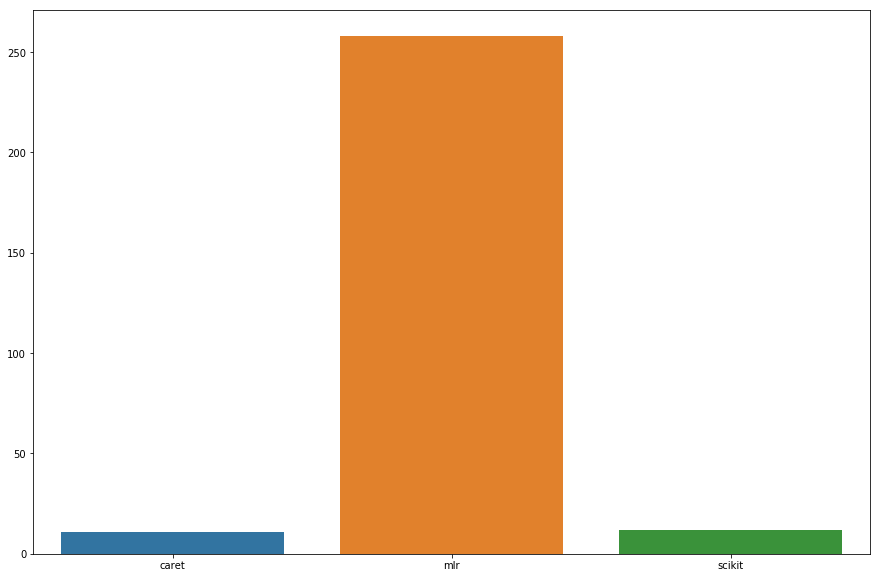

In [533]:
sns.barplot(np.sort(df.library.unique()),df.groupby('library').size())
plt.show()

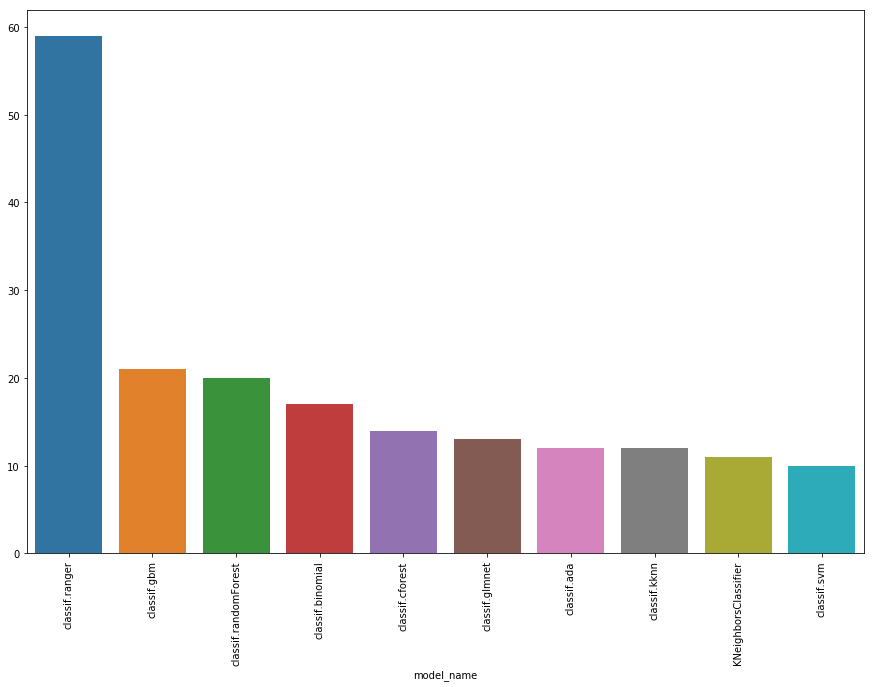

In [534]:
sns.barplot(df.groupby('model_name').size().nlargest(10).index,df.groupby('model_name').size().nlargest(10))
plt.xticks(rotation=90)
plt.show()

# Preprocessing

In [535]:
df.shape

(281, 13)

In [536]:
X = df.drop(columns=['acc','auc','specificity','recall','precision','f1'])
Y = df.loc[:,['acc','auc','specificity','recall','precision','f1']]

## One Hot Encoding

In [537]:
X=pd.get_dummies(X, columns=['added_by','library','model_name'])

# Model

## ACC

In [538]:
test_model(X,Y,'acc',LinearRegression)

Zbiór uczący:
MSE:  0.004217045855670847
MAE:  0.038890601841750555
R2:  0.8517165684871706


Zbiór testowy:
MSE:  0.018459261547048963
MAE:  0.0768142294210789
R2:  0.4112027165769


In [539]:
test_model(X,Y,'acc',MLPRegressor)

Zbiór uczący:
MSE:  148011.6161244819
MAE:  88.22295978680413
R2:  -4440026.79361184


Zbiór testowy:
MSE:  220729.7713619776
MAE:  116.53370302389848
R2:  -14493223.341494326


## AUC

In [540]:
test_model(X,Y,'auc', LinearRegression)

Zbiór uczący:
MSE:  0.000587919856112725
MAE:  0.014781236577307495
R2:  0.9552048563621407


Zbiór testowy:
MSE:  1.7844965977807754
MAE:  0.5465992683674119
R2:  -169.00956327905166


In [541]:
test_model(X,Y,'auc',MLPRegressor)

Zbiór uczący:
MSE:  29152360.854019817
MAE:  1386.0497467891714
R2:  -2173204219.6142626


Zbiór testowy:
MSE:  42524534.63726714
MAE:  1758.941153544882
R2:  -4068551626.3200083


## Specificity

In [542]:
test_model(X,Y,'specificity', LinearRegression)

Zbiór uczący:
MSE:  0.004676814423390873
MAE:  0.040568688135589615
R2:  0.9210296609542622


Zbiór testowy:
MSE:  1073.8561187200987
MAE:  4.752308266371329
R2:  -17973.88684272299


In [543]:
test_model(X,Y,'specificity',MLPRegressor)

Zbiór uczący:
MSE:  15000711.035994899
MAE:  984.802672417621
R2:  -254927795.7953381


Zbiór testowy:
MSE:  23203775.586655222
MAE:  1368.5302886634731
R2:  -372534167.46784955


## Recall

In [544]:
test_model(X,Y,'recall', LinearRegression)

Zbiór uczący:
MSE:  0.005918145690984251
MAE:  0.035325451856360664
R2:  0.8891390796113177


Zbiór testowy:
MSE:  3.197680428708559
MAE:  0.6108677572664558
R2:  -54.6793735249331


In [545]:
test_model(X,Y,'recall',MLPRegressor)

Zbiór uczący:
MSE:  38704616.57637348
MAE:  1676.7208566008446
R2:  -815452358.7204791


Zbiór testowy:
MSE:  24030845.89112132
MAE:  1128.9540650791894
R2:  -320326765.38241756


## Precision

In [546]:
test_model(X,Y,'precision', LinearRegression)

Zbiór uczący:
MSE:  0.0008371795933059911
MAE:  0.01700824670418347
R2:  0.9601489626384284


Zbiór testowy:
MSE:  2.00841601178535
MAE:  0.4738875037812156
R2:  -97.35940599013217


In [547]:
test_model(X,Y,'precision',MLPRegressor)

Zbiór uczący:
MSE:  13936990.40326261
MAE:  973.5485296085758
R2:  -684380734.4865751


Zbiór testowy:
MSE:  39126845.79679148
MAE:  1813.0035536958144
R2:  -1725624112.691977


## F1

In [548]:
test_model(X,Y,'f1', LinearRegression)

Zbiór uczący:
MSE:  0.0065941922182681575
MAE:  0.03718453381703169
R2:  0.8608940078389447


Zbiór testowy:
MSE:  344.44243636259904
MAE:  2.6923813533218954
R2:  -9067.094829388068


In [549]:
test_model(X,Y,'f1',MLPRegressor)

Zbiór uczący:
MSE:  15879.823577706104
MAE:  33.26049310592073
R2:  -384433.75506206


Zbiór testowy:
MSE:  10261.73352842191
MAE:  29.413106026326428
R2:  -187506.6449386715


# Model tylko dla modelu classif.ranger z biblioteki mlr

In [550]:
df = create_data_frame(True)

In [551]:
df.head()

,number_of_features,number_of_instances,number_of_missing_values,number_of_instances_with_missing_values,acc,auc,specificity,recall,precision,f1,added_by,library,model_name,num.trees
0,17,45211,0,0,0.9017,0.9277,0.2732,0.985,0.911,0.9465,WojciechKretowicz,mlr,classif.ranger,1000
1,17,45211,0,0,0.9075,0.9328,0.4643,0.9662,0.9316,0.9486,WojciechKretowicz,mlr,classif.ranger,500
2,17,45211,0,0,0.8896,0.9099,0.0707,0.9981,0.8902,0.9411,WojciechKretowicz,mlr,classif.ranger,500
3,17,45211,0,0,0.9077,0.933,0.4649,0.9663,0.9317,0.9487,WojciechKretowicz,mlr,classif.ranger,1000
4,17,45211,0,0,0.8896,0.9101,0.0713,0.998,0.8902,0.9411,WojciechKretowicz,mlr,classif.ranger,1000


In [552]:
df.shape

(59, 14)

## Mało danych

In [553]:
X = df.drop(columns=['acc','auc','specificity','recall','precision','f1'])
X=pd.get_dummies(X, columns=['added_by','library','model_name'])
Y = df.loc[:, ['acc','auc','specificity','recall','precision','f1']]

## ACC

In [554]:
test_model(X,Y,'acc',LinearRegression)

Zbiór uczący:
MSE:  5.029153545897084e-06
MAE:  0.0009552118951190194
R2:  0.9997754299491958


Zbiór testowy:
MSE:  1.2808708017600887e-05
MAE:  0.0018078669214350862
R2:  0.9996619900634137


In [555]:
test_model(X,Y,'acc',MLPRegressor)

Zbiór uczący:
MSE:  23.123491623640263
MAE:  3.537331353596409
R2:  -1081.9012033793356


Zbiór testowy:
MSE:  128.1917933112754
MAE:  6.961524404439076
R2:  -3318.8302715203363


## AUC

In [556]:
test_model(X,Y,'auc',LinearRegression)

Zbiór uczący:
MSE:  1.8497630857841368e-05
MAE:  0.0019213697721984187
R2:  0.9962138938255193


Zbiór testowy:
MSE:  3.3402173493209378e-06
MAE:  0.0010156323436067093
R2:  0.9978936504255268


In [557]:
test_model(X,Y,'auc',MLPRegressor)

Zbiór uczący:
MSE:  2.5898356965756633
MAE:  1.286358209124387
R2:  -529.0114480681306


Zbiór testowy:
MSE:  25.474780203378806
MAE:  3.082806114262639
R2:  -16410.184802666477


## Specificity

In [558]:
test_model(X,Y,'specificity',LinearRegression)

Zbiór uczący:
MSE:  0.002497740819935475
MAE:  0.021311226382288415
R2:  0.9581822274839544


Zbiór testowy:
MSE:  0.008468634195289227
MAE:  0.04843152834125462
R2:  0.8811421170009277


In [559]:
test_model(X,Y,'specificity',MLPRegressor)

Zbiór uczący:
MSE:  105865.61364747501
MAE:  287.1426466305721
R2:  -1494015.1421320164


Zbiór testowy:
MSE:  85712.81015613582
MAE:  238.51248534045894
R2:  -2760606.486372466


## Recall

In [560]:
test_model(X,Y,'recall',LinearRegression)

Zbiór uczący:
MSE:  2.2886057684783454e-05
MAE:  0.0019783980607285773
R2:  0.9971540662346402


Zbiór testowy:
MSE:  4.4477096490933083e-05
MAE:  0.0026533980607284734
R2:  0.373558492006533


In [561]:
test_model(X,Y,'recall',MLPRegressor)

Zbiór uczący:
MSE:  2.9134153436281394
MAE:  1.1795491049492672
R2:  -362.92591824770216


Zbiór testowy:
MSE:  54114.08338299809
MAE:  104.94985195306181
R2:  -3085726859.676519


## Precision

In [562]:
test_model(X,Y,'precision', LinearRegression)

Zbiór uczący:
MSE:  5.775633548426203e-05
MAE:  0.003223314321741995
R2:  0.9915550648515089


Zbiór testowy:
MSE:  3.4655607253764643e-07
MAE:  0.0005178818565405363
R2:  0.9994228917014802


In [563]:
test_model(X,Y,'precision',MLPRegressor)

Zbiór uczący:
MSE:  78680.4944128184
MAE:  219.7011446336973
R2:  -12032002.72777321


Zbiór testowy:
MSE:  12421.439647824009
MAE:  105.17305980238879
R2:  -41394738.90428329


## F1

In [564]:
test_model(X,Y,'f1', LinearRegression)

Zbiór uczący:
MSE:  1.2907105901372573e-07
MAE:  0.00021430288331897678
R2:  0.9999822472166804


Zbiór testowy:
MSE:  7.5383395538478615e-06
MAE:  0.0015203306386417758
R2:  0.9724098848761232


In [565]:
test_model(X,Y,'f1',MLPRegressor)

Zbiór uczący:
MSE:  394594.74908388784
MAE:  379.4616325745811
R2:  -101647679.96777295


Zbiór testowy:
MSE:  252140.55864978852
MAE:  293.822507970808
R2:  -25034904.8285209


# Wnioski

## Przypadek ogólny

Z uwagi na to, że różne modele mają różne parametry, to rozpatrując zbiór danych całościowo nie można sie do tych parametrów odwołać. Wtedy też wyniki przewidywań miar są dość słabe. Regresje liniowa z uwagi na niewielką liczbę danych sprawuje się najlepiej.

## Przypadek dla classif.ranger

Gdy ograniczymy zbiór jedynie do jednego modelu - classif.ranger, wtedy jakość przewidywanie drastycznie wzrasta, ale pojawia się problem z przeuczeniem i określeniem, jak bardzo poprawne wyniki dostajemy.